In [1]:
# Matthew Nuss, Coding homework 8, due Friday, October 9, 2020. 5:00 pm. 

1. (a)

In [87]:
# the input values. This question has a=0.001, b=1000, c=0.001

a = float(input("Input the a-value behind x-squared: "))
b = float(input("Input the b-value behind x: "))
c = float(input("Input the c-value, the constant: "))

# quadratic equation solutions, + and -
x_plus = ((-1*b) + (((b**2)-(4*a*c))**(0.5)))/(2*a)  
x_minus = ((-1*b) - (((b**2)-(4*a*c))**(0.5)))/(2*a)

# print statements
print("The two solutions are:", x_plus, x_minus)

Input the a-value behind x-squared: 0.001
Input the b-value behind x: 1000
Input the c-value, the constant: 0.001
The two solutions are: -9.999894245993346e-07 -999999.999999


1. (b)

In [1]:
# the input values. This question has a=0.001, b=1000, c=0.001

a = float(input("Input the a-value behind x-squared: "))
b = float(input("Input the b-value behind x: "))
c = float(input("Input the c-value, the constant: "))

# other quadratic equation solutions, + and -
x_plus_other = (2*c)/((-1*b) + (((b**2)-(4*a*c)**(0.5))))  
x_minus_other = (2*c)/((-1*b) - (((b**2)-(4*a*c)**(0.5))))

# print statements
print("The two solutions are:", x_plus_other, x_minus_other)

Input the a-value behind x-squared: 0.001
Input the b-value behind x: 1000
Input the c-value, the constant: 0.001
The two solutions are: 2.002002006010014e-09 -1.99800200199401e-09


We see that though we have the equation for the quadratic equation coded in, we have the wrong answers. This is due to the programs ability to be accurate. As we do more subtraction with numbers closer and closer together, our chance for error in the calculation increases, which is what is happening above. That is why the goal of part (c) is to figure out a way to combine the best of each form of the equation, so we get the corrent answer all the time. Something we learned when I used two different quadratic formula calculators. One only used the method from (a), so they didn't take this error into account and thus will sometimes give the wrong answer. 

### Below are notes for the problem solving, ignore if you want.

Expected values are -499,999 for "plus" and 500,001 for "plus" for the inputs... let's analyze with a=5, b=100, and c=1 to analyze better... expect -0.010005 for "plus" and -19.989995 for "minus". a=5, b=10, c=1 we expect -0.10557 for "plus" and -1.8944 for "minus"

x_plus: works well for all cases it seems, for 0.001, 1000, 0.001 got ; for 5, 10, 1 got really close, and for 5, 100, 1 got the exact number. GOOD FOR IMAGINARY SOLUTIONS, WHEN B^2 < 4*A*C

x_plus_other: does not work for any cases. Was far off on all trials. DOES NOT SHOW IMAGINARY SOLUTIONS

##doing a new trial for the minus to get accuracy for numbers close together. a=1.1, b=1, c=0.1, expect -0.114395 and -0.794696

x_minus: works well for cases when b^2-4ac is very large, especially under the radical. Got the exact answer for 5, 100, 1. GOOD FOR IMAGINARY SOLUTIONS, WHEN B^2 < 4*A*C

x_minus_other: when the numbers are further apart does not work well, off by a few factors. off for medium range numbers such as the 5, 10, 1. DOES NOT SHOW IMAGINARY SOLUTIONS. should work for when. good when -b- sqrt(b^2-4ac) < 2e-7.

## Okay you can stop ignoring now. 

1. (c)

In [3]:
# use if statements to set parameters for which equation to use and when. 
# now to use these parameters found to solve for best solution!

# the input values. This question has a=0.001, b=1000, c=0.001

a = float(input("Input the a-value behind x-squared: "))
b = float(input("Input the b-value behind x: "))
c = float(input("Input the c-value, the constant: "))

# x_plus_best
x_plus_best = ((-1*b) + (((b**2)-(4*a*c))**(0.5)))/(2*a)

# x_minus_best 
if ((-1*b) - (((b**2)-(4*a*c)**(0.5)))) > 0:
    x_minus_best = (2*c)/((-1*b) - (((b**2)-(4*a*c)**(0.5))))
    
if ((-1*b) - (((b**2)-(4*a*c)**(0.5)))) <= 2e-7:
    x_minus_best = (2*c)/((-1*b) - (((b**2)-(4*a*c)**(0.5))))
    
if ((-1*b) - (((b**2)-(4*a*c)**(0.5)))) <= 0:
    x_minus_best = ((-1*b) - (((b**2)-(4*a*c))**(0.5)))/(2*a)
    
if ((-1*b) - (((b**2)-(4*a*c)**(0.5)))) > 2e-7:
    x_minus_best = ((-1*b) - (((b**2)-(4*a*c))**(0.5)))/(2*a)
    
# print statements
print("The two solutions are:", x_plus_best, x_minus_best)

Input the a-value behind x-squared: 0.001
Input the b-value behind x: 1000
Input the c-value, the constant: 0.001
The two solutions are: -9.999894245993346e-07 -999999.999999


2. (a)

In [2]:
# define the known values/constants, SI units. Import math.
import numpy as np
from numpy import math
Temp = 5  ## range in T from 5 to 500 K


def cv(T): 
    V = 0.001
    rho = 6.022e28
    theta = 428
    k = 1.380649e-23
    # the integral
    def f(x):
        if x == 0:
            return 0
        else:
            return (x**4)*(np.exp(x))/(((np.exp(x))-1)**2)

    N = 1000
    a = 0
    b = theta/T
    h = (b-a)/N

    s = 0.5*f(a) + 0.5*f(b)
    for k in range (1,N):
        s += f(a+k*h)

    return 9*V*rho*k*((T/theta)**3*(h*s))

# print(cv(Temp))

# make for loop to generate the values of temp and cv, then want to store these values
temp_plot = []
cv_plot = []
for temp in range(5,505,5):
    temp_plot.append(temp)  ## x-value, temperature
    cv_plot.append(cv(temp)) ## y-value, cv(temp)
    
# temp_plot
# cv_plot

2. (b)

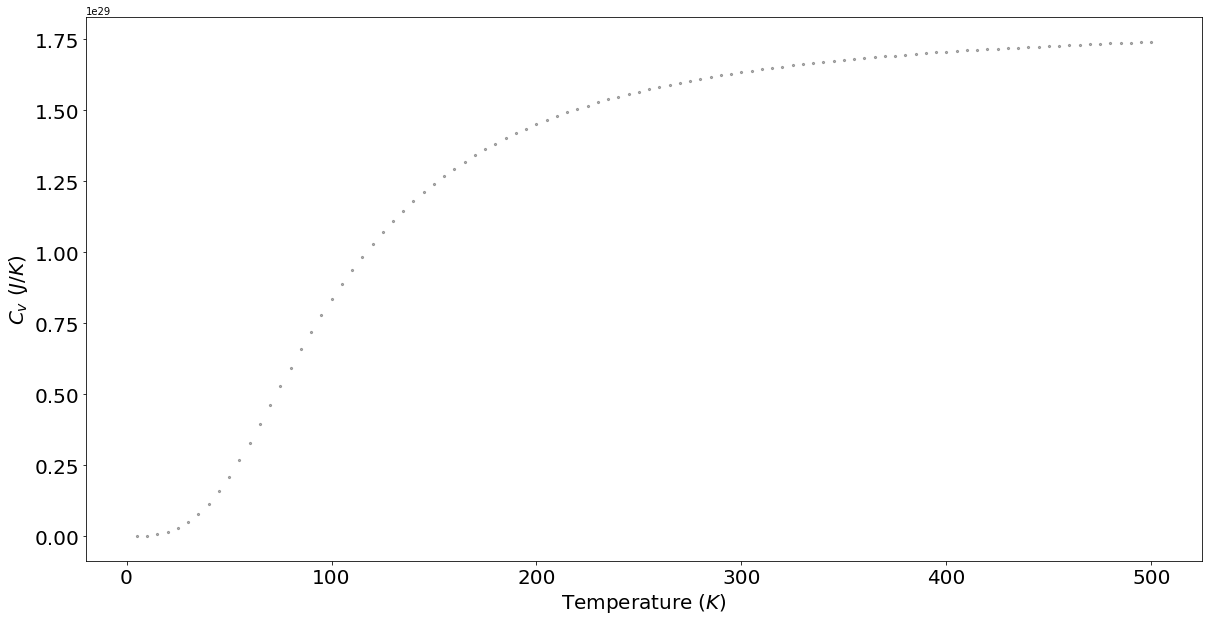

In [42]:
# now to plot...
# import package
from matplotlib import pyplot as plt

# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(temp_plot,cv_plot,s=5,c='k',alpha=0.3)

# add the labels
ax.set_xlabel("Temperature $(K)$",size=20)
ax.set_ylabel("$C_{v}$ $(J/K)$",size=20)

# increase the size of the numbers on the axes
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

## make sure to post the figure itself in GitHub!